# BERT (Bidirectional Encoder Representations from Transformers)

BERT language model is an open source machine learning framework for natural language processing (NLP). BERT is designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context.

## How BERT works

BERT makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary. The detailed workings of Transformer are described in a paper by Google.

As opposed to directional models, which read the text input sequentially (left-to-right or right-to-left), the Transformer encoder reads the entire sequence of words at once. Therefore it is considered bidirectional, though it would be more accurate to say that it’s non-directional. This characteristic allows the model to learn the context of a word based on all of its surroundings (left and right of the word).

When training language models, there is a challenge of defining a prediction goal. Many models predict the next word in a sequence (e.g. “The child came home from ___”), a directional approach which inherently limits context learning. To overcome this challenge, BERT uses two training strategies:

## 1. Masked LM (MLM)
Before feeding word sequences into BERT, 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence. In technical terms, the prediction of the output words requires:

    Adding a classification layer on top of the encoder output.
    Multiplying the output vectors by the embedding matrix, transforming them into the vocabulary dimension.
    Calculating the probability of each word in the vocabulary with softmax.

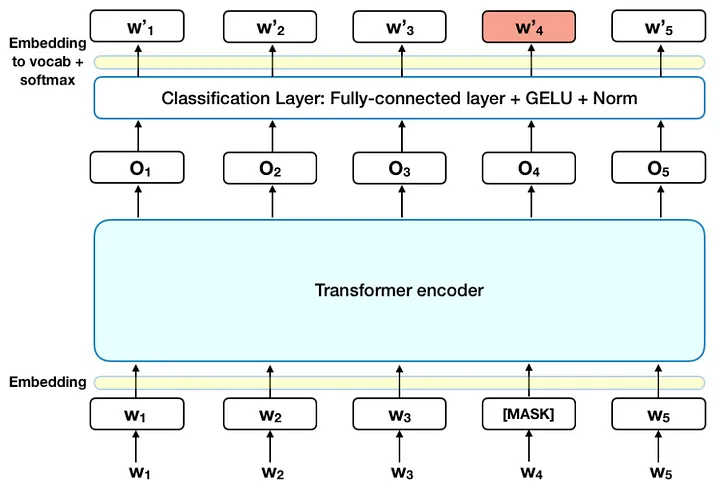

The BERT loss function takes into consideration only the prediction of the masked values and ignores the prediction of the non-masked words. As a consequence, the model converges slower than directional models, a characteristic which is offset by its increased context awareness (see Takeaways #3)


## 2. Next Sentence Prediction (NSP)

In the BERT training process, the model receives pairs of sentences as input and learns to predict if the second sentence in the pair is the subsequent sentence in the original document. During training, 50% of the inputs are a pair in which the second sentence is the subsequent sentence in the original document, while in the other 50% a random sentence from the corpus is chosen as the second sentence. The assumption is that the random sentence will be disconnected from the first sentence.

To help the model distinguish between the two sentences in training, the input is processed in the following way before entering the model:

    A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
    A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2.
    A positional embedding is added to each token to indicate its position in the sequence. The concept and implementation of positional embedding are presented in the Transformer paper.

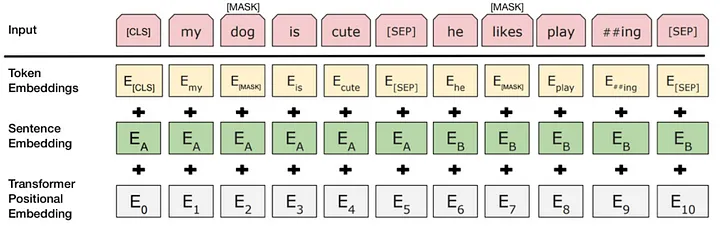

To predict if the second sentence is indeed connected to the first, the following steps are performed:

    The entire input sequence goes through the Transformer model.
    The output of the [CLS] token is transformed into a 2×1 shaped vector, using a simple classification layer (learned matrices of weights and biases).
    Calculating the probability of IsNextSequence with softmax.

When training the BERT model, Masked LM and Next Sentence Prediction are trained together, with the goal of minimizing the combined loss function of the two strategies.

## How to use BERT (Fine-tuning)

Using BERT for a specific task is relatively straightforward:

BERT can be used for a wide variety of language tasks, while only adding a small layer to the core model:

    Classification tasks such as sentiment analysis are done similarly to Next Sentence classification, by adding a classification layer on top of the Transformer output for the [CLS] token.

    In Question Answering tasks (e.g. SQuAD v1.1), the software receives a question regarding a text sequence and is required to mark the answer in the sequence. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.
    
    In Named Entity Recognition (NER), the software receives a text sequence and is required to mark the various types of entities (Person, Organization, Date, etc) that appear in the text. Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.

In the fine-tuning training, most hyper-parameters stay the same as in BERT training, and the paper gives specific guidance (Section 3.5) on the hyper-parameters that require tuning. The BERT team has used this technique to achieve state-of-the-art results on a wide variety of challenging natural language tasks, detailed in Section 4 of the paper.

### Conclusion

BERT is undoubtedly a breakthrough in the use of Machine Learning for Natural Language Processing. The fact that it’s approachable and allows fast fine-tuning will likely allow a wide range of practical applications in the future. In this summary, we attempted to describe the main ideas of the paper while not drowning in excessive technical details. For those wishing for a deeper dive, we highly recommend reading the full article and ancillary articles referenced in it. Another useful reference is the BERT source code and models, which cover 103 languages and were generously released as open source by the research team.
Appendix A — Word Masking

Training the language model in BERT is done by predicting 15% of the tokens in the input, that were randomly picked. These tokens are pre-processed as follows — 80% are replaced with a “[MASK]” token, 10% with a random word, and 10% use the original word. The intuition that led the authors to pick this approach is as follows (Thanks to Jacob Devlin from Google for the insight):

    If we used [MASK] 100% of the time the model wouldn’t necessarily produce good token representations for non-masked words. The non-masked tokens were still used for context, but the model was optimized for predicting masked words.
    If we used [MASK] 90% of the time and random words 10% of the time, this would teach the model that the observed word is never correct.
    If we used [MASK] 90% of the time and kept the same word 10% of the time, then the model could just trivially copy the non-contextual embedding.

No ablation was done on the ratios of this approach, and it may have worked better with different ratios. In addition, the model performance wasn’t tested with simply masking 100% of the selected tokens.